# Cascading process on networks and Systemic risk

---

## Motivation: Systemic Risk

- In this view, risk is endogeneous to the system
  - Systems generate the conditions of their failure themselves
  - This is opposed to exogeneous risk which is like a meteor hitting the earth

### Characteristics of risk as endogeneous

1. Interaction: Failure of *the few* gets amplified in the system
   1. 1 node failure may lead to whole system failing if network allows
2. Systemic feedback: Macroscopic coupling
3. Trend reinforcement: History matters
   1. e.g. initalization of network


**Systemic Risk**
- risk that a whole system comprised of many agents fails
- macroscopic property that emerges from the nonlinear interactions of agents and is amplified through macroscopic feedback


### Modeling systemic risk with cascading processes

Examples of cascading processes:
- Epidemic spreading 
  - COVID, adoption of new tech
- Load redistribution
  - Power grid, fiber bundle
- **Overload redistribution**
  - **Bankruptcy**, financial contagion
  - Relevant for our risk modeling project

---

# Modeling

- $s$: Boolean state of the agent.
  - $s=0$: Agent is alive
  - $s=1$: Agent is dead, bankrupt etc.
- $\theta_i$: "Health" of the agent: Individual threshold for failure
  - For banks this $\theta_i$ should be rather high because of catastrophic consequences
  - Agents are heterogeneous, e.g. $\theta_i \sim N(\mu, \sigma)$
- $\phi_i(t)$: Fragility of agent
  - $\phi_i(t) > \theta_i$: Agent fails/dies $\rightarrow s_i(t+1)=1$
- $z_i(t) = \phi_i(t)-\theta_i$: Net fragility


Deterministic dynamics (Can also introduce stochastic)
- $s_i(t+1) = \Theta[z_i(t)]$
- $\Theta[\cdot]$: Heaviside function



**Global fraction of failed agents**

$$X(t) = \frac{1}{N} \sum_{i=1}^N s_i(t)$$

**Systemic Risk**

$$X(t \rightarrow \infin) = X^* \rightarrow 1$$



There are two fundamental types of this model:

1. Inward

Agent's fragility equals the proportion of failing or failed neighbors

![Inward model](inward_model_example.png)


2. Outward

Failed or failing agent distributes equal fragility to each neighbor


![Outward model](outward_model_example.png)

---

In [2]:
%reload_ext autoreload
%autoreload 2

# 0. Prerequisites

Install requried packages:
1. If desired, create virtual environment Command+Shift+P -> Python: Create Environment -> Select desired Python installation
2. Make sure you are in project root folder: In terminal ```ls``` should show the cascading-process folder
3. In terminal run ```pip install -r requirements.txt``` to install all required modules for this notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from model import CascadeNetwork

# 1. Example Model

Original paper for follwing network setup, loads and capacities is by Lorenz et al.: `DOI: 10.1140/epjb/e2009-00347-4`

## Tweakable parameters
1. Adjacency matrix: The initial network configuration
2. Load vector: The initial loads that are imposed on each agent
3. Capacity vector: The load capacities for each node. If load is above this capacity the node fails

In [4]:
# Adjacency matrix is a nxn matrix where n is the number of nodes and each 
# entry shows if there is an edge between the node on the row and the column

# Diagonal is zero because we will not have any self-looping edges

adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vector = [1, 1, 3.6, 1, 1, 1, 1, 1, 1]
capacity_vector = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

In [5]:
# Inward model
# Constant loads (simplest form for now)
my_model = CascadeNetwork(adj_matrix, load_vector, capacity_vector, "constant", "in", test=True)
# Here we run the model

num_steps = 10
for _ in range(num_steps):
    my_model.step()

Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 3.60, failing
Node 3 (Capacity = 1.3): Load 1.00, non-failed
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------
Step 1:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 0.00, failed
Node 3 (Capacity = 1.3): Load 0.50, non-failed
Node 4 (Capacity = 1.5): Load 0.00, non-failed
Node 5 (Capacity = 1.55): Load 0.00, non-failed
Node 6 (Capacity = 1.55): Load 0.00, non-failed
Node 7 (Capacity = 1.55): Load 0.00, non-failed
Node 8 (Capacity = 1.55): Load 0.00, non-failed
------------------------------------------------------------
Step 2:
Node 0 

/opt/homebrew/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


The initial above example ended up in only 1 failed agent! 
Because the loads of the neighboring agents were only 1, and they had a higher capacity

Net fragility of nodes: [0.7, 0.7, -2.3, 0.8, 1.5, 1.55, 1.55, 1.55, 1.55]


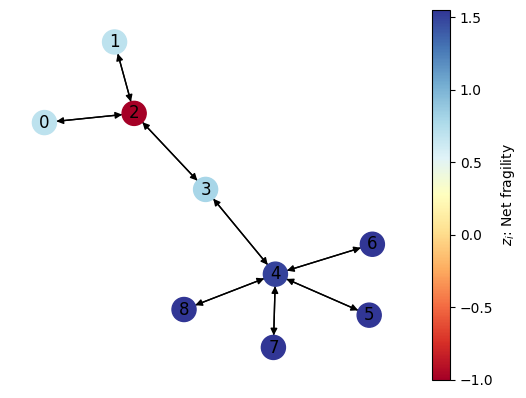

In [6]:
%reload_ext autoreload
%autoreload 2

from visualization_functions import plot_network

plot_network(my_model)
print("Net fragility of nodes:", [node.capacity-node.final_load if node.failed else node.capacity-node.load for node in my_model.schedule.agents])

## Graph explanation

The above graph shows the network we've run the simulation on. The numbers are their ID's, while their colors is the net fragility, that is $z_i = \theta_i - \phi_i(t)$. If $z_i < 0$, the agent is failing or has failed and is a red color. In the current above graph, we can see that the surrounding nodes got a lower net fragility but still greater than zero, meaning they have not failed.

### Challenge

Try running a new simulation where you add a node that is connected to nodes 0,1,2,3 that will fail because node 2 fails, and its failure will also lead to failures of node 0,1,3 and potentially spread to 4

# 2. Plot phase diagram - Fraction of agents failed

In [7]:
def fraction_failed(model):
    """Return the fraction of the failed nodes for the given `model`"""
    states = [node.failed for node in model.schedule.agents]
    N = model.num_nodes
    return sum(states) / N

In [8]:
fixed_params = {'adj_matrix': adj_matrix,
                'load_vec': np.ones(adj_matrix.shape[0]), # all load equal to one
                'model_type': 'constant', 
                'load_type': 'in'}


mus = np.arange(0, 1, step=0.01) # step=0.002: 7 minutes!! Step=0.01: <1min
sigmas = np.arange(0, 1, step=0.01)
repetitions = 5

In [9]:
average_cascade_size = np.zeros((len(mus), len(sigmas)))

for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        sizes = []
        for _ in range(repetitions):
            # Generate capacity vector 'c_vec' using 'np.random.normal'
            c_vec = np.random.normal(loc=mu, scale=sigma, size=adj_matrix.shape[0]) # YOUR CODE HERE
            # Initialize model with 'c_vec' and 'fixed_params'
            model = CascadeNetwork(**fixed_params, capacity_vec=c_vec) # YOUR CODE HERE
            
            while model.running and model.schedule.steps < 100:
                model.schedule.steps += 1  # Simulate model step
                model.step()
            
            sizes.append(fraction_failed(model))
        
        average_cascade_size[i, j] = np.mean(sizes)

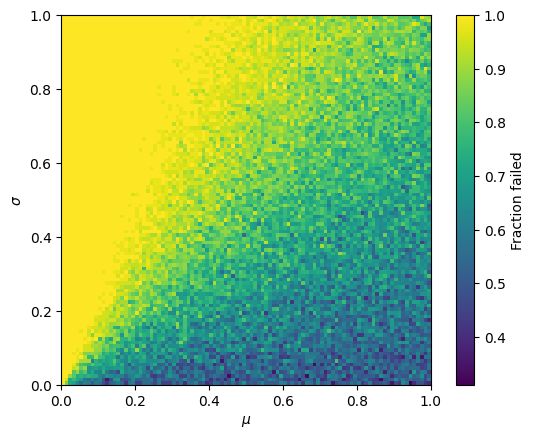

In [10]:
fig = plt.figure()
im = plt.imshow(average_cascade_size, extent=(0,1,0,1))
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
fig.colorbar(im, label="Fraction failed")
plt.show()

# Overload redistribution
More realistic scenario where the overload of the failing node is redistributed to neighboring nodes. E.g. financial institution that goes bankrupt and still has unsettled liabilities towards neighboring institutions. Their liabilities (overload) are transferred

In [11]:
adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vector = [1, 1, 3.6, 1, 1, 1, 1, 1, 1]
capacity_vector = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 3.60, failing
Node 3 (Capacity = 1.3): Load 1.00, non-failed
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------
Step 1:
Node 0 (Capacity = 1.7): Load 1.77, failing
Node 1 (Capacity = 1.7): Load 1.77, failing
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.77, failing
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------
Step 2:
Node 0 (Capacity

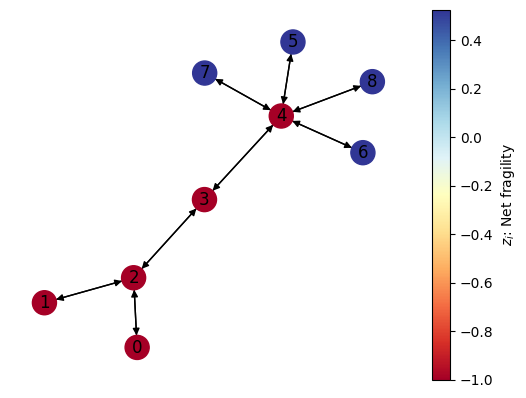

In [18]:
overload_model = CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llsc", test=True)

num_steps = 5

for _ in range(num_steps):
    overload_model.step()

plot_network(overload_model)

In the same example as without overload redistribution we see a lot more failing nodes, because the first failing node had a lot of overload that spread to its neighbors